SGDRegressor y SGDClassifier
====

* *30 min* | Última modificación: Julio 11, 2019

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

## Regresión

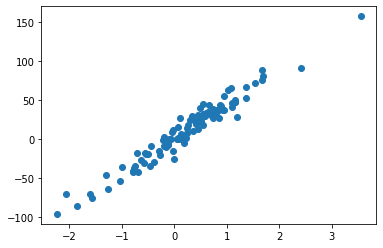

In [2]:
from sklearn.datasets import make_regression

X, y = make_regression(
    n_samples=100,         #
    n_features=1,          #
    n_informative=1,       #
    bias=0.0,              # intercepto
    effective_rank=None,   # numero de vectores singulares para explicar los datos
    tail_strength=0.9,     # ? importancia relativa de las colas
    noise=10.0,            #
    shuffle=False,         # ?
    coef=False,            # ?coeficientes de la regresion 
    random_state=12356)    #

plt.scatter(X, y);


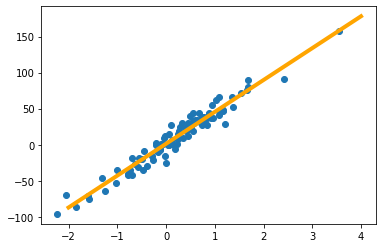

In [3]:
from sklearn.linear_model import SGDRegressor

sgdRegressor = SGDRegressor(
    loss='squared_loss',         # 'squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'
    penalty='l2',                # 'none', 'l2', 'l1', 'elasticnet'
    alpha=0.0001,                # factor regularización
    l1_ratio=0.15,               # ElasticNet
    fit_intercept=True,          #
    max_iter=1000,               #
    tol=0.001,                   # 
    shuffle=True,                # ?datos de entrenamiento
    verbose=0,                   #
    epsilon=0.1,                 # epsilon-insensitive loss function
    random_state=None,           #
    learning_rate='invscaling',  # 'constant', 'optimal', 'invscaling', 'adaptive'
    eta0=0.01,                   # leaning_rate = constant
    power_t=0.25,                # inverse scaling learning rate
    early_stopping=False,        #
    validation_fraction=0.1,     #
    n_iter_no_change=5,          #
    warm_start=False,            #
    average=False)               # average weights


sgdRegressor.fit(X, y)

plt.scatter(X, y)

X_pred = np.linspace(start=-2, stop=4, num=50)
X_pred = [[x] for x in X_pred]
y_pred = sgdRegressor.predict(X_pred)
plt.plot(X_pred, y_pred, '-', linewidth = 4, color='orange');

## Clasificación

### Dataset

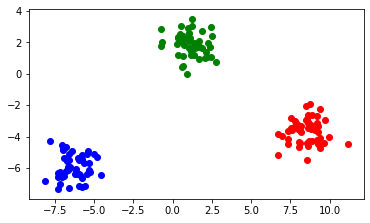

In [4]:
from sklearn.datasets import make_blobs

NPOINTS = 150

X, d = make_blobs(
    n_samples=NPOINTS, 
    n_features=2,
    centers=3,
    cluster_std=0.8, 
    shuffle=False,  
    random_state=12345)

plt.scatter(X[:50,0], X[:50,1], color='red')
plt.scatter(X[50:100,0], X[50:100,1], color='blue')
plt.scatter(X[100:,0], X[100:,1], color='green')
plt.gca().set_aspect('equal', adjustable='box')

### Modelo

In [5]:
from sklearn.linear_model import SGDClassifier

sgdClassifier = SGDClassifier(
    loss='hinge',                # 'hinge', 'log', 'modified_huber', 'squared_hinge', 
                                 # 'perceptron', 'squared_loss', 'huber', 'epsilon_insensitive', 
                                 # 'squared_epsilon_insensitive'
    penalty='l2',                # 'none', 'l2', 'l1', or 'elasticnet'
    alpha=0.0001,                # regularization
    l1_ratio=0.15,               # Elastic Net
    fit_intercept=True,          #
    max_iter=1000,               #
    tol=0.001,                   #
    shuffle=True,                # ?shuffle training data after each epoch
    verbose=0,                   #
    epsilon=0.1,                 # epsilon insensitive loss function
    random_state=None,           #
    learning_rate='optimal',     # 'constant', 'optimal', 'invscaling', 'adaptive'
    eta0=0.0,                    #
    power_t=0.5,                 # eta = eta0 / pow(t, power_t) para 'invscaling'
    early_stopping=False,        # 
    validation_fraction=0.1,     # para early_stopping
    n_iter_no_change=5,          #
    class_weight=None,           # 
    warm_start=False,            # ?reusa solución previa
    average=False)               # 


sgdClassifier.fit(X, d)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [6]:
sgdClassifier.coef_

array([[  9.17984201,  -9.0332372 ],
       [-32.38345592, -14.34846758],
       [  0.61967664,  38.81812241]])

In [7]:
sgdClassifier.intercept_

array([-49.71283893, -37.96440731,   5.11558828])

In [8]:
sgdClassifier.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### Fronteras de decisión

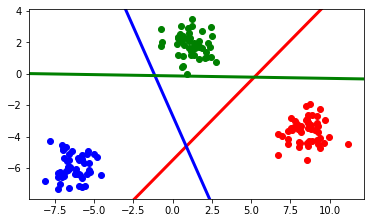

In [9]:
plt.scatter(X[:50,0], X[:50,1], color='red')
plt.scatter(X[50:100,0], X[50:100,1], color='blue')
plt.scatter(X[100:,0], X[100:,1], color='green')
plt.gca().set_aspect('equal', adjustable='box')

xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()

xplot = np.linspace(start=xlim[0], stop=xlim[1], num=20)
fronteraA = (- sgdClassifier.intercept_[0] / sgdClassifier.coef_[0][1] 
             - sgdClassifier.coef_[0][0] / sgdClassifier.coef_[0][1] * xplot)

fronteraB = (- sgdClassifier.intercept_[1] / sgdClassifier.coef_[1][1] 
             - sgdClassifier.coef_[1][0] / sgdClassifier.coef_[1][1] * xplot)

fronteraC = (- sgdClassifier.intercept_[2] / sgdClassifier.coef_[2][1] 
             - sgdClassifier.coef_[2][0] / sgdClassifier.coef_[2][1] * xplot)

plt.plot(xplot, fronteraA, color='red', linewidth=3)
plt.plot(xplot, fronteraB, color='blue', linewidth=3)
plt.plot(xplot, fronteraC, color='green', linewidth=3);

plt.xlim(xlim)
plt.ylim(ylim);